In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')


## Data Preprocessing

In [2]:
# importing the data in Pandas
df_myopia = pd.read_csv('Resources/myopia.csv')
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# removing 'MYOPIC' column
df_myopia.drop('MYOPIC', axis=1, inplace=True)

In [5]:
# standardizing the dataset
scaler = StandardScaler()
myopia_scaled = scaler.fit_transform(df_myopia)
myopia_scaled[:3]

array([[-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
        -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
         0.18405806,  0.49830393,  0.98713773,  1.0032415 ],
       [-0.42021911, -0.30861224, -0.1718398 ,  0.53591028, -0.96799728,
        -0.13076253, -0.99889822, -0.91206246, -0.36187479, -0.22140908,
        -0.34093217, -0.87508755,  0.98713773,  1.0032415 ],
       [-0.42021911,  0.60438629, -0.00997682, -0.5066285 , -0.17781207,
         0.21580879,  0.25709181, -0.91206246, -0.03443904, -0.67299591,
         0.18405806, -0.75023378, -1.01302987, -0.99676897]])

In [6]:
myopia_scaled.shape

(618, 14)

## Dimensionality Reduction (PCA and t-SNE)

In [8]:
# initializing PCA model with 90% explained variance
# reduces the number of dimensions from 14 to 10
pca = PCA(n_components=0.90) 

myopia_pca = pca.fit_transform(myopia_scaled)
myopia_pca.shape

(618, 10)

In [9]:
# converting PCA data to a dataframe where PC stands for Principal Component
df_myopia_pca = pd.DataFrame(data=myopia_pca, 
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

df_myopia_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [22]:
# further reducing the dataset with t-SNE to 2 dimensions
tsne = TSNE(learning_rate=600)

tsne_features = tsne.fit_transform(df_myopia_pca)
tsne_features.shape

(618, 2)

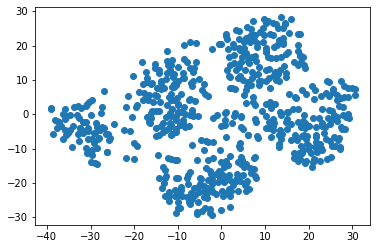

In [16]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

After running t-SNE on the PCA transformed-data, there appears to be around 5 distinct clusters.

## Cluster Analysis with K-Means

## Recommendations

